# Анализ рынка заведений общественного питания Москвы
<h1>Цели и задачи</h1>
<br>Необходимо проанализировать и визуализировать данные о работе заведений общественного питания в городе Москва. Анализ в различных разрезах необходим для правильного позиционрования нового заведения и понимания перспектив его развития.
<br><b>Цель:</b> дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Разработать предположения и предложения о возможности развития сети.
<h1>Исходные данные</h1>
Файл с основными данными по заведениям общественного питания в г. Москва. В файле собраны данные о названии места, его типе, адресе расположения, количестве посадочных мест, а также о признаке "сетевое/несетевое" заведение.
<h2>Подготовка данных</h2>

Импортируем все необходимые для работы библиотеки:

In [1]:
#библиотеки
import pandas as pd
from datetime import datetime,timedelta as dt
import scipy.stats as stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

Откроем датасет, выведем информацию о содержащихся полях и типах данных, а также выведем первые 5 строк датасета на экран:

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Отлично! Первый взгляд на данные есть

Пропущенные значения отсутсвуют.
<br>Явно необходимо изменить тип данных поля "chain" на Boolean, а также проверить на наличие явных дубликатов

In [3]:
df.loc[df['chain']=="нет",'chain']=0
df.loc[df['chain']=="да",'chain']=1
df['chain'].astype('bool')
print('Обнаружено явных дубликатов:')
print(df.duplicated().sum())
df=df.drop_duplicates().reset_index(drop=True) 

Обнаружено явных дубликатов:
0


Так как заведения сами по себе очень разнородные, выведем по 20 строчек с начала и с конца датафрейма для ознакомления

In [4]:
display(df.head(20))
display(df.tail(20))

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,0,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,1,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,0,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,1,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,0,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,0,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,0,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


,id,object_name,chain,object_type,address,number
15346,208599,Мята Lounge,1,кафе,"город Москва, Куликовская улица, дом 1А",30
15347,222491,Кальянная «Мята Lounge»,1,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40
15348,212216,Мята Lounge,1,кафе,"город Москва, Привольная улица, дом 11",56
15349,206341,Мята Lounge,1,кафе,"город Москва, Салтыковская улица, дом 7Г",100
15350,213061,Мята,1,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35
15351,223036,Якитория,1,ресторан,"город Москва, Авиационная улица, дом 66",92
15352,213602,Тануки,1,кафе,"город Москва, Привольная улица, дом 65/32",50
15353,213772,Тануки,1,ресторан,"город Москва, Осенний бульвар, дом 9",98
15354,210400,Шоколадница,1,кафе,"город Москва, Театральный проезд, дом 5, строе...",45
15355,74972,Шоколадница,1,кафе,"город Москва, улица Новый Арбат, дом 13",30


Проверим названия кафе на наличие неявных дубликатов.
<br>Приведем столбец с названиями к нижнему регистру и проверим на наличие неявных дубликатов

In [5]:
df['object_name']=df['object_name'].str.lower()
print('Обнаружено неявных дубликатов с учетом регистра:')
print(df.duplicated().sum())
df=df.drop_duplicates().reset_index(drop=True) 

Обнаружено неявных дубликатов с учетом регистра:
0


Углубим проверку на неявные дубликаты: Создадим новый датафрейм, удалим столбец id приведем названия адреса к нижнему регистру и проверим:

In [6]:
df['address']=df['address'].str.lower()
df=df.drop(columns = ['id'],axis = 1)
display(df.head())
print('Обнаружено неявных дубликатов :')
print(df.duplicated().sum())
df=df.drop_duplicates().reset_index(drop=True) 

,object_name,chain,object_type,address,number
0,сметана,0,кафе,"город москва, улица егора абакумова, дом 9",48
1,родник,0,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,кафе «академия»,0,кафе,"город москва, абельмановская улица, дом 6",95
3,пиццетория,1,кафе,"город москва, абрамцевская улица, дом 1",40
4,кафе «вишневая метель»,0,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


Обнаружено неявных дубликатов :
85


Тут уже дубликаты были обнаружены и удалены.

<br>Для дальнейшей группировки проверим возможные написания названий заведений и количесвто уникальных названий:

In [7]:
print(df['object_name'].unique())
#можно вывести весь перечень через .sum() но так еще непонятнее
print('Униклаьных названий:', df['object_name'].nunique())

['сметана' 'родник' 'кафе «академия»' ... 'бар мята lounge'
 'мята lounge октябрьская' 'кальянная «мята lounge»']
Униклаьных названий: 9924


Очевидно, что уникальных данных по названию слишком много и такая группировка будет затруднительной. Попробуем выделить по типу объекта

In [8]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Типов объектов немного. Такая группировка будет достаточна и удобна для решения дальнейших задач.

<br><h2>Анализ данных</h2>
<br><h3>Соотношение видов объектов общественного питания по количеству</h3>
Построим график соотношения видов объектов общественного питания по количеству

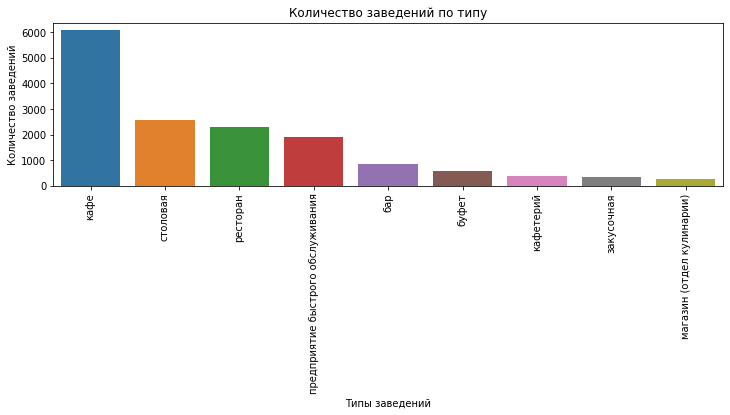

In [9]:
num_by_type = df.pivot_table(index='object_type',values='object_name',aggfunc='count').reset_index().sort_values(by='object_name',ascending = False)
plt.figure(
    figsize=(12, 3)
) 
sns.barplot(x='object_type',y='object_name',data=num_by_type)

plt.title('Количество заведений по типу')
plt.ylabel('Количество заведений')
plt.xlabel('Типы заведений')
plt.xticks(rotation=90)

plt.show()

Наибольшее число заведений (свыше 6000) имеют кафе, далее с большим отрывом идут столовые (около 3000), рестораны (2500) и предприятия быстрого обслуживания (чуть более 2000 заведений).
<br>Это позволяет сделать вывод, что если мы позиционируем наше заведение как "кафе", то оно попадает в жестко конкурентную среу и должно выгодно выделяться среди остальных как новизной предложения (обслуживают роботы - это хороший дифференциатор на старте), так и конкруентными ценами и качеством обслуживания. А эти показатели надо поддеживать на дистанции.

<br><h3>Соотношение сетевых и несетевых заведений по количеству</h3>
Построим график соотношения сетевых и несетевых заведений по количеству

Определим среди всех заведений долю сетевых и несетевых

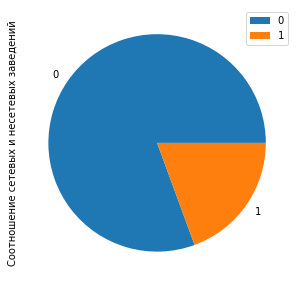

,Сетевое - да/нет,Количество объектов,Доля
0,0,12317,0.806034
1,1,2964,0.193966


In [10]:
shares=df.pivot_table(index='chain',values='object_name',aggfunc='count').reset_index()
shares.plot.pie(y='object_name', figsize=(5, 5))
plt.ylabel('Соотношение сетевых и несетевых заведений')
plt.show()
shares = shares.rename(columns={"chain":"Сетевое - да/нет","object_name":"Количество объектов" })
shares['Доля']=shares['Количество объектов']/shares['Количество объектов'].sum()
display(shares)

В целом по заведениям преобладают (порядка 80%) несетевые.
<br>Теперь определим долю сетевых заведений внутри каждого типа:

,object_type,object_name,chain,chain_share
3,предприятие быстрого обслуживания,1897,788,0.415393
8,магазин (отдел кулинарии),273,78,0.285714
2,ресторан,2282,543,0.237949
0,кафе,6071,1396,0.229946
7,закусочная,348,56,0.160920
6,кафетерий,395,52,0.131646
4,бар,855,37,0.043275
5,буфет,576,11,0.019097
1,столовая,2584,3,0.001161


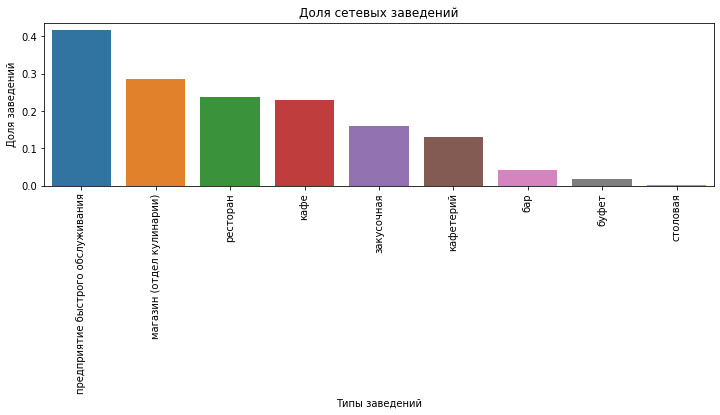

In [11]:
chain_by_type = df.pivot_table(index='object_type',values='chain',aggfunc='sum').reset_index()
num_by_type=num_by_type.merge(chain_by_type,on='object_type',how='left')
num_by_type['chain_share']=num_by_type['chain']/num_by_type['object_name']
num_by_type=num_by_type.sort_values(by='chain_share', ascending=False)
display(num_by_type)
plt.figure(
    figsize=(12, 3)
) 
sns.barplot(x='object_type',y='chain_share',data=num_by_type)

plt.title('Доля сетевых заведений')
plt.ylabel('Доля заведений')
plt.xlabel('Типы заведений')
plt.xticks(rotation=90)
plt.show()

Сетевые заведения преобладают среди предприятий быстрого обслуживания (около 40%), отделов кулинарии (30%), ретсораны и кафе (оба - примерно 25%). То есть, в целевом для нас сегменте кафе около 75% составляют несетевые заведения.

<h3>Характеристики сетевого заведения</h3>
Изучим, какая посадка характерна для сетевых заведений - много или мало посадочных мест? Для этого построим диаграмму рассеяния количества мест для заведений с разделением по признаку "сетевое/несетевое". 
<br>Таким образом, мы определим разброс количесвта мест в заведениях с выделением "сетевое/несетевое", и, заодно поймем, много мест - это сколько?


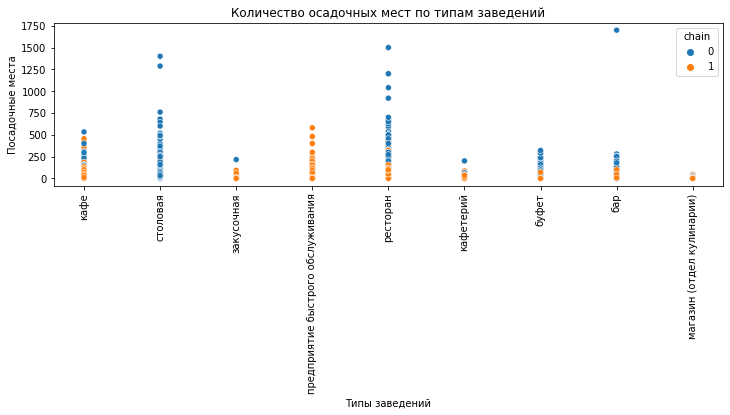

In [12]:
plt.figure(
    figsize=(12, 3)
) 
sns.scatterplot(x='object_type',y='number',hue='chain',data=df)
plt.title('Количество осадочных мест по типам заведений')
plt.ylabel('Посадочные места')
plt.xlabel('Типы заведений')
plt.xticks(rotation=90)
plt.show()

Данный график не слишком информативен и дублирует выводы предыдущего графика. Оданко, он даёт еще один повод для проверки:
<br>Заведения с количеством мест в больше 1000 и даже больше 500 выглядят  как анломалии, поэтому выведем на экран некоторые из них и проверим.

In [13]:
display(df.query('number>500'))

,object_name,chain,object_type,address,number
120,макдоналдс,1,предприятие быстрого обслуживания,"город москва, большая бронная улица, дом 29",580
2294,ресторан «михаил светлов»,0,ресторан,"город москва, измайловское шоссе, дом 71, корп...",542
2313,ресторан «альфа»,0,ресторан,"город москва, измайловское шоссе, дом 71, корп...",1040
2317,ресторан «бета»,0,ресторан,"город москва, измайловское шоссе, дом 71, корп...",660
3399,дурдинъ,0,ресторан,"город москва, мичуринский проспект, дом 8, стр...",650
3683,рум сервис,0,ресторан,"город москва, площадь европы, дом 2",1200
4107,столовая,0,столовая,"город москва, каширское шоссе, дом 31",680
4476,рум сервис,0,ресторан,"город москва, кутузовский проспект, дом 2/1, с...",1200
5315,кардинал,0,кафе,"город москва, хибинский проезд, дом 14, строен...",533
5637,столовая московский гуманитарный университет,0,столовая,"город москва, улица юности, дом 5, строение 1",760


Проверил эти заведения, они действительно существуют (напрмиер, банкетный зал на 1500 человек или бар Arena by Soho на 1700) - аномалий тут нет, продолжаем дальше.
<br>Предыдущий график не слишком информативен. Построим для среза сетевых заведений точечный график с количеством заведений и количеством мест

,object_name,count,mean
,,,
0,beverly hills diner,1,88.000000
1,bierloga,1,75.000000
2,black & white,1,40.000000
3,bocconcino,3,66.666667
4,boobo,1,46.000000
...,...,...,...
572,ямми микс,1,2.000000
573,ян примус,1,300.000000
574,японский ресторан «ваби-саби»,1,155.000000


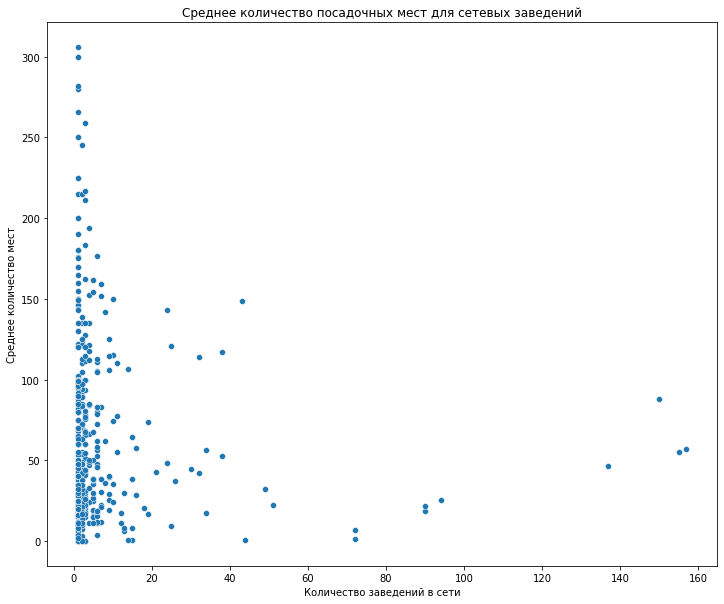

<Figure size 864x720 with 0 Axes>

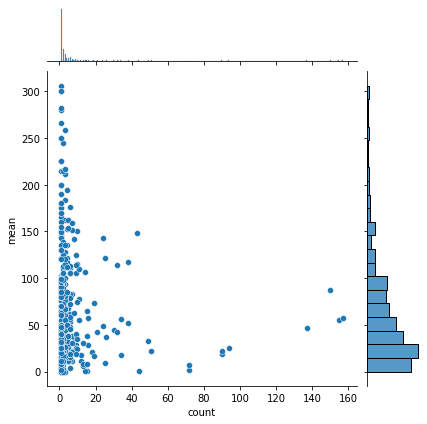

In [14]:
seats_number= df.query('chain==1').pivot_table(index='object_name',values='number',aggfunc=['count','mean']).reset_index()

seats_number = seats_number.rename(columns={"number":""})
display(seats_number)

plt.figure(
    figsize=(12, 10)
) 
sns.scatterplot(x='count',y='mean',data=seats_number)
plt.title('Среднее количество посадочных мест для сетевых заведений')
plt.ylabel('Среднее количество мест')
plt.xlabel('Количество заведений в сети')
plt.show()
#для наглдядности можно построить jointplot
plt.figure(
    figsize=(12, 10)
) 
sns.jointplot(x='count',y='mean',data=seats_number)
plt.ylabel('Седнее количество мест')
plt.xlabel('Количество заведений в сети')
plt.show()

Очевидно, что для сетевых заведений в среднем характерно небольшое число заведений (меньше 10) с небольшим (25-30) количеством мест. Несколько, очевидно крупнейших известных сетей имеют очень большое количесвто ресторанов около 150 шт с количестовм мест чуть выше среднего (50 мест).

<h3>Хараектристика количества мест</h3>
Определим для каждого вида объекта общественного питания  среднее количество посадочных мест. Построим boxplot для каждого вида заведений

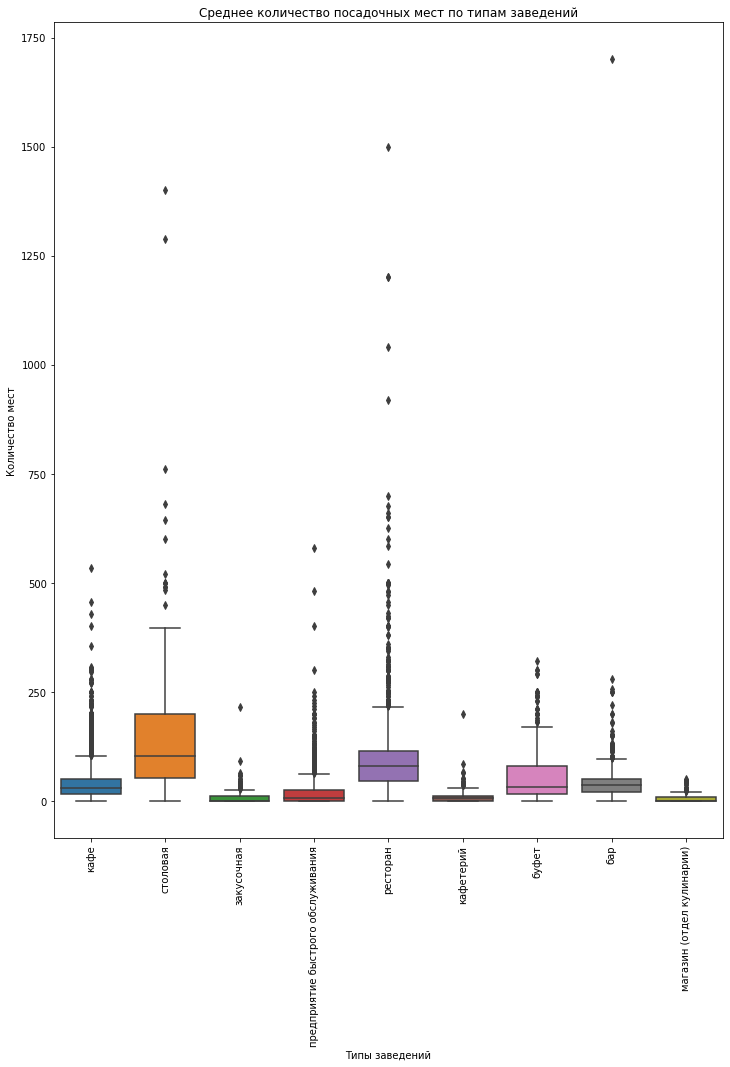

In [15]:
plt.figure(
    figsize=(12, 15)
)
sns.boxplot(x="object_type", y="number", data=df)
plt.title('Среднее количество посадочных мест по типам заведений')
plt.ylabel('Количество мест')
plt.xlabel('Типы заведений')
plt.xticks(rotation=90)
plt.show()

Максимальное количество мест предоставляют столовые, рестораны, а также один бар (Arena by Soho). Для большей наглядности в изучении средних занчений "отрежем" заведения с более чем 750 местами

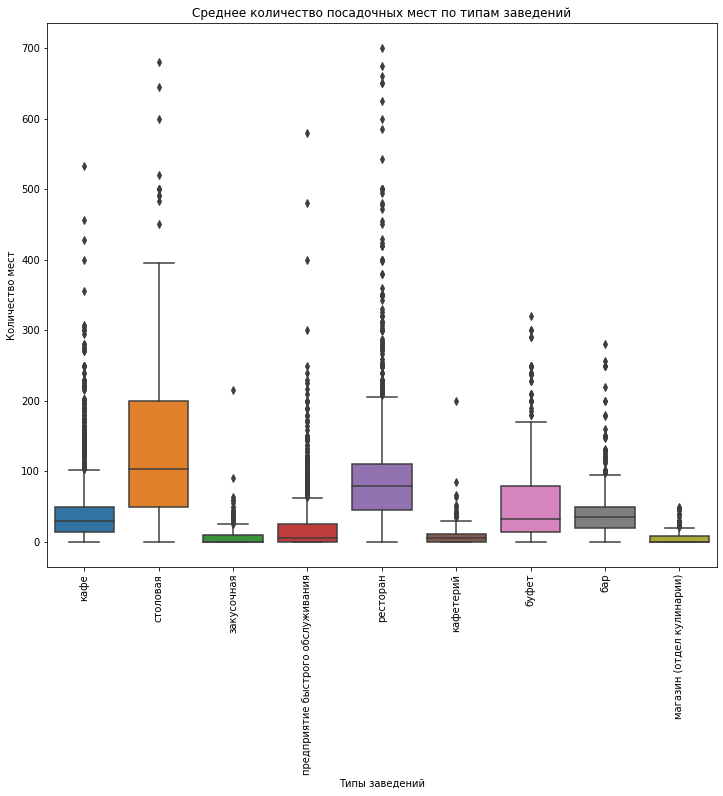

In [16]:
plt.figure(
    figsize=(12, 10)
)
sns.boxplot(x="object_type", y="number", data=df.query('number<750'))
plt.title('Среднее количество посадочных мест по типам заведений')
plt.ylabel('Количество мест')
plt.xlabel('Типы заведений')
plt.xticks(rotation=90)
plt.show()

В среднем, наибольшее медианное число мест имеют столовые,рестораны и буфеты, они же имеют и максимлаьный размах. Столовые и рестораны имеют макисмальные выбросы (бар не считаем, он всего один с большим числом мест).
<br>В интересующем нас сегменте "кафе" среднее количесвто мест порядка 30 с интервалом от 10 до 50 по верхнему и нижнему квартилям.

<h3>Обработка адресов расположения заведений</h3>

Выделим в отдельный столбец информацию об улице из столбца address
<br>Для этого напишем функцию, которая по ключевым словами вида "улица, ул., шоссе" и проч. будет выделять содержимое, ограниченное запятыми, и выносить его в отдельный столбец


In [17]:
street_def = ['улица', 'проезд', 'бульвар', 'шоссе', 'проезд','проспект','переулок','тупик','ул.','пр.','бульв.','площадь', 'пл.']

def get_street(row):
    for e in row.split(','):
        for i in street_def:
            if i in e.lower():
                return e
df['street'] = df['address'].apply(get_street)
df['street'] = df['street'].str.strip()
display(df.head())

,object_name,chain,object_type,address,number,street
0,сметана,0,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,родник,0,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,кафе «академия»,0,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,пиццетория,1,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,кафе «вишневая метель»,0,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


In [18]:
#в принципе, можно вот так
#streets = df.groupby(by=["street"])["id"].count().sort_values(ascending=False)
#display(streets.head(10))

#Но мы сделаем через pivot, чтоб использовать в дальнейшем
streets=df.pivot_table(index='street',values='object_name',aggfunc='count').reset_index()
display(streets.sort_values(by='object_name',ascending=False).head(10))

,street,object_name
1032,проспект мира,203
1036,профсоюзная улица,182
670,ленинградский проспект,172
395,варшавское шоссе,165
673,ленинский проспект,148
1028,проспект вернадского,128
660,кутузовский проспект,114
590,каширское шоссе,111
597,кировоградская улица,108
1770,ходынский бульвар,102


Построим график улиц

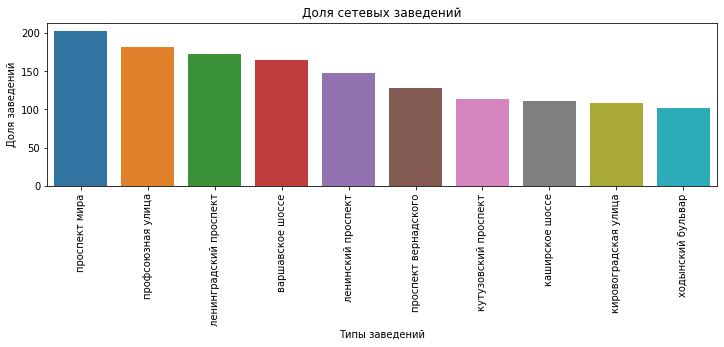

In [19]:
top_10_streets=streets.sort_values(by='object_name',ascending=False).head(10)
plt.figure(
    figsize=(12, 3)
) 
sns.barplot(x='street',y='object_name',data=top_10_streets)

plt.title('Доля сетевых заведений')
plt.ylabel('Доля заведений')
plt.xlabel('Типы заведений')
plt.xticks(rotation=90)
plt.show()

Загрузим внешний источник для соотнесения района и улицы

In [20]:
#from io import BytesIO
#import requests
#spreadsheet_id = '<ИДЕНТИФИКАТОР_GOOGLE_SPREADSHEET>'
#file_name = 'https://docs.google.com/presentation/d/1locZxLYEPUHMCJUUIXybff-KfodJPgqWpNxkxWhy92U/edit?usp=sharing'#.format(spreadsheet_id)
#r = requests.get(file_name)
#df = pd.read_csv(BytesIO(r.content))
#df 

distr = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')
distr['streetname']=distr['streetname'].str.lower()
distr = distr.rename(columns={"streetname":"street"})
display(distr.head(10))

,street,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район
5,малый гнездниковский переулок,17,ЦАО,Пресненский район
6,большая грузинская улица,17,ЦАО,Пресненский район
7,малая грузинская улица,17,ЦАО,Пресненский район
8,грузинская площадь,17,ЦАО,Пресненский район
9,улица грузинский вал,17,ЦАО,Пресненский район


Определим районы, где расположены ТОП-10 улиц

In [21]:
top_10_streets=top_10_streets.merge(distr,on='street',how='left')
display(top_10_streets)

,street,object_name,areaid,okrug,area
0,проспект мира,203,70,СВАО,Алексеевский район
1,проспект мира,203,86,СВАО,Ярославский Район
2,проспект мира,203,78,СВАО,Район Марьина роща
3,проспект мира,203,79,СВАО,Останкинский район
4,проспект мира,203,81,СВАО,Район Ростокино
5,проспект мира,203,82,СВАО,Район Свиблово
6,проспект мира,203,16,ЦАО,Мещанский район
7,профсоюзная улица,182,123,ЮЗАО,Академический район
8,профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,профсоюзная улица,182,134,ЮЗАО,Район Ясенево


Улицы, на которых расположено наибольшее количесвто заведений - длинные вылетные магистрали. За счёт большой длины на этих адресах расположено максимальное количесвто завдений. Причем, географически их нельзая отнести к какому-то только одному району города - они начинаются от ТТК и заканчиваются на МКАД. Для полноты картины можно выделить административыне округа, к которым принадлежаат данные районы :

In [22]:
print(top_10_streets['okrug'].unique())

['СВАО' 'ЦАО' 'ЮЗАО' 'САО' 'ЮАО' 'ЗАО']


Очевиден фокус на "левую" - западную, южную, юго-западную и северную части Столицы. Центры притяжения на восточных вылетных магистралях (Энтузиастов, Волгоградский, Рязанский, Щелковское) отсутсвуют.

Определим улицы, где расположены только по 1 заведению общепита:

In [23]:
streets_1=streets.query('object_name==1')
display(streets_1.head(20))
print('Количество улиц только с одним заведением:',streets_1.shape[0])

,street,object_name
2,1-й балтийский переулок,1
3,1-й басманный переулок,1
4,1-й ботанический проезд,1
7,1-й вешняковский проезд,1
9,1-й голутвинский переулок,1
14,1-й заречный переулок,1
15,1-й зачатьевский переулок,1
17,1-й кирпичный переулок,1
18,1-й кожевнический переулок,1
19,1-й кожуховский проезд,1


Количество улиц только с одним заведением: 536


Найдем аналогично все районы, через которые проходят эти улицы

In [24]:
streets_1=streets_1.merge(distr,on='street',how='left')
display(streets_1.head(20))

,street,object_name,areaid,okrug,area
0,1-й балтийский переулок,1,54.0,САО,Район Аэропорт
1,1-й басманный переулок,1,13.0,ЦАО,Басманный район
2,1-й басманный переулок,1,15.0,ЦАО,Красносельский район
3,1-й ботанический проезд,1,82.0,СВАО,Район Свиблово
4,1-й вешняковский проезд,1,120.0,ЮВАО,Рязанский район
5,1-й голутвинский переулок,1,21.0,ЦАО,Район Якиманка
6,1-й заречный переулок,1,NaN,NaN,NaN
7,1-й зачатьевский переулок,1,20.0,ЦАО,Район Хамовники
8,1-й кирпичный переулок,1,36.0,ВАО,Район Соколиная Гора
9,1-й кожевнический переулок,1,98.0,ЮАО,Даниловский район


Построим график для ТОП-5 районов

In [25]:
distr_pivot=streets_1.pivot_table(index=['area','okrug'],values='object_name',aggfunc='sum').reset_index().sort_values(by='object_name', ascending=False)
display(distr_pivot.head(5))

,area,okrug,object_name
3,Басманный район,ЦАО,25
80,Район Хамовники,ЦАО,25
94,Таганский район,ЦАО,24
21,Пресненский район,ЦАО,20
95,Тверской район,ЦАО,20


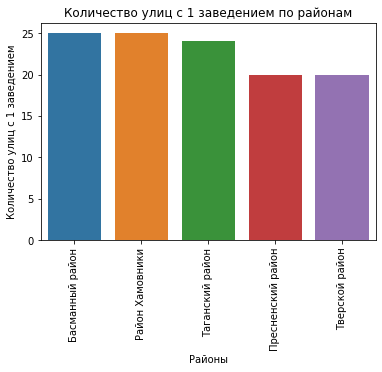

In [26]:
sns.barplot(x='area',y='object_name',data=distr_pivot.head(5))

plt.title('Количество улиц с 1 заведением по районам')
plt.ylabel('Количество улиц с 1 заведением')
plt.xlabel('Районы')
plt.xticks(rotation=90)
plt.show()

<b>Выводы по адресам размещения</b>
<br>Улицы, на которых расположено наибольшее количесвто заведений - длинные вылетные магистрали. За счёт большой длины на этих адресах расположено максимальное количесвто завдений. Причем, географически их нельзая отнести к какому-то только одному району города - они начинаются от ТТК и заканчиваются на МКАД с фокусом на западную и северную часть Столицы. Причем, выделяется с фокус на западную и северную часть Столицы. Центры притяжения на восточных вылетных магистралях (Энтузиастов, Волгоградский, Рязанский, Щелковское) отсутсвуют.
<br>Улицы с одним заведением - маленькие улицы (переулки и проезды), как правило, расположенные в пределах ТТК, или даже ближе к центру. Есть выбросы за тертье кольцо, или даже за МКАД (Новокосино), но тем не менее в основном можно утверждать, что это малленькте короткие улицы внутри Третьего транспортного кольца. Топ-5 районов с улицами, имеющими 1 заведение сосредоточены в ЦАО.

<h2>Рекомендации</h2>
Сегмент "кафе" - один из наиболее конкурентных в Москве, поэтому для того, чтобы выделиться необходимо иметь какое-то уникальное предложение. Обслуживание роботами может помочь эффектно выделиться среди конкурентов на первое время, но в дальнейшем необходимо держать сатбильно высокий уровень обслуживания и приемлемые цены для поддержания конкурентоспособности.
<br>Наиболее оптимально иметь порядка 20-30 посадочных мест в кафе, то есть около 5-7 столиков. 
<br>Также для такого достаточно камерного формата (кафе со своей "фишкой", явно не рассчитанное на массового потребителя) рекомендуется располагать в пределах ТТК на тихих небольших улицах вдали от крупных магистралей.
<br>Презентация по ссылке ниже:

Презентация: <https://drive.google.com/file/d/1LpKpWSr9ijiEgLboK4D5TyAF1uql5BAR/view?usp=sharing>